In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from numpy.random import seed

In [2]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta :  float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors,
            where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        
        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
       """Calculate net input"""
       return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
       """Compute linear activation"""
       return self.net_input(X)
    
    def predict(self, X):
       """Return class label after unit step"""
       return np.where(self.activation(X) >= 0.0, 1, -1)


In [4]:
-

In [5]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


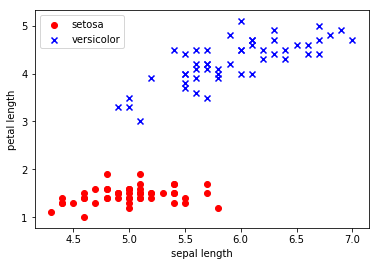

In [7]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

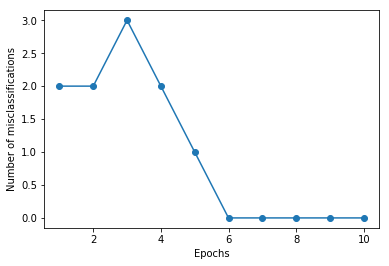

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

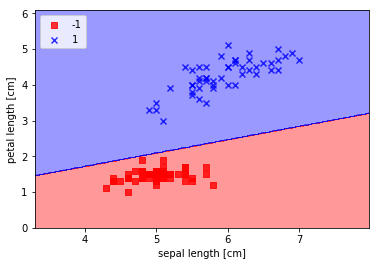

In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

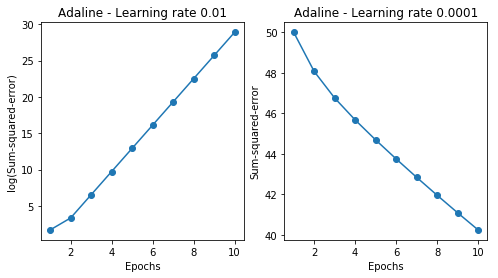

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

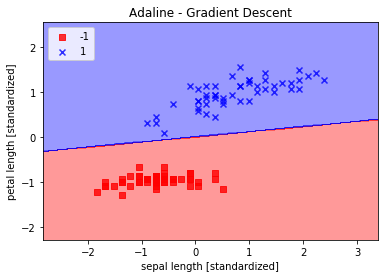

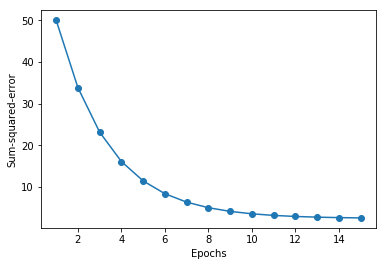

In [11]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

error:  1.0
error:  0.982654356253
error:  -1.00186814776
error:  0.974056217644
error:  0.969790414784
error:  -0.996809689636
error:  -0.968728015301
error:  0.950580734163
error:  0.934386590337
error:  0.887846614404
error:  0.888391967253
error:  -0.94876648835
error:  0.79983323235
error:  0.711221879548
error:  0.731828356763
error:  -0.912282677029
error:  -0.916028878537
error:  -0.903499742414
error:  0.734884913269
error:  -0.882037472054
error:  -0.748453457121
error:  0.66350530308
error:  0.674078441169
error:  0.725088301027
error:  -0.793679324347
error:  -0.715374556507
error:  0.75195321853
error:  -0.777791166671
error:  -0.756883156132
error:  -0.546024401033
error:  0.708110926988
error:  0.71692816833
error:  0.430080866282
error:  0.674701650034
error:  0.704181110035
error:  -0.640950717886
error:  -0.738906676937
error:  0.835559531405
error:  -0.716516720713
error:  -0.609308649176
error:  0.258851862081
error:  0.723051753736
error:  0.163516972281
error:  -0

error:  -0.186665364353
error:  0.22491282969
error:  -0.179636280389
error:  -0.417472199656
error:  0.379727623033
error:  -0.205202573866
error:  -0.0201388403301
error:  -0.176272812231
error:  0.0341711912902
error:  -0.17537751261
error:  -0.124920055553
error:  -0.127862806065
error:  -0.274055872724
error:  -0.00268220268297
error:  -0.139200551485
error:  0.000258710987939
error:  -0.0683012927743
error:  0.0542965226769
error:  -0.021660112117
error:  0.487322748455
error:  -0.35511220662
error:  -0.3791160604
error:  0.349283056723
error:  0.638190077175
error:  -0.136023772749
error:  -0.252919399895
error:  0.29111065578
error:  -0.128806917689
error:  0.174705118313
error:  0.214083123055
error:  0.00451782516912
error:  0.0350970806427
error:  -0.0558970940504
error:  0.148821489127
error:  -0.0170143026988
error:  -0.23385849765
error:  -0.143426609564
error:  0.0224426340555
error:  -0.053675399884
error:  -0.18593480374
error:  -0.0514777093711
error:  -0.049460443955

error:  -0.115233577764
error:  -0.353314148348
error:  -0.173455097668
error:  -0.0938926129913
error:  0.00150987312203
error:  0.19192356587
error:  -0.0179953823492
error:  -0.340438248608
error:  0.581078155908
error:  -0.0781808978352
error:  -0.0637659306591
error:  -0.226480568229
error:  -0.140313270179
error:  -0.0557045714797
error:  -0.332038860241
error:  -0.0377590785588
error:  -0.0925074262311
error:  -0.131554585224
error:  -0.229923847065
error:  -0.0525177058018
error:  0.321724995385
error:  -0.0154686181452
error:  -0.105314407619
error:  0.0424915664045
error:  0.127368682831
error:  0.0758515410428
error:  0.297728481111
error:  0.199738832421
error:  0.0535152741542
error:  -0.16557338786
error:  0.399949135646
error:  0.0685599972297
error:  -0.217170530656
error:  0.137981924904
error:  -0.154146461381
error:  -0.112206619403
error:  0.108346954312
error:  0.179152790342
error:  -0.432257986341
error:  0.0361966803168
error:  -0.364855005206
error:  -0.0581772

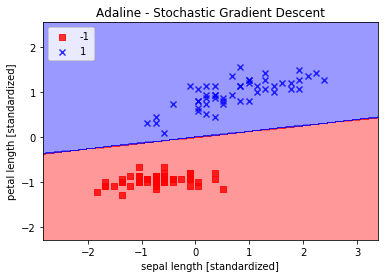

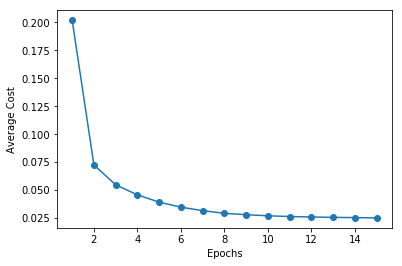

In [12]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

In [13]:
def _shuffle(X, y):
    """Shuffle training data"""
    r = np.random.permutation(len(y))
    print(type(r))
    return X[r], y[r]

In [16]:
t = X[[0]]
print(t)
t.dot(.5)

[[ 5.1  1.4]]


array([[ 2.55,  0.7 ]])